==============
Best neighborhood for children under 10---
by playground equipment type
==============

We are trying to determine which neighborhood is the best for kids under 10, and I am using equipemnt types in playgrounds to determine which neighborhood would be most popular

In [ ]:
import pandas as pd
import numpy as np
import geopandas
#importing all the things needed

In [48]:
pg = pd.read_csv('playGroundData.csv')
#importing the dataset

In [49]:
pg #show the dataset

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.4,-80.0
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.5,-80.0
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.4,-79.9
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,nan,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.4,-79.9
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,nan,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.4,-79.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,1301777506,Granville Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,175.0,Granville St,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.4,-80.0
441,1828281616,Granville Playground,Geo Climber,Playworld,SofSurfaces,f,175.0,Granville St,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.4,-80.0
442,904290786,Spring Garden Ave Playground,Geo Climber,NaN,Engineered Wood Fiber,f,844.0,Spring Garden Ave,East Allegheny,1,23,42003563200,1,23,1,1-5,40.5,-80.0
443,370549255,Spring Garden Ave Playground,Spring Toy - Fire Truck,NaN,Engineered Wood Fiber,f,844.0,Spring Garden Ave,East Allegheny,1,23,42003563200,1,23,1,1-5,40.5,-80.0


------------
I asign a value between 0 to 1 based on my interpretation of how much children under 10 would like the equipment type in the playground. For example, Play area 2 to 5 has the lowest score because the targeted range is small and young for all kids under 10; on the other hand 3 swings and above have the highest score because generally any given age likes swings especially when there are multiple swings to allow friends to play together.

In [50]:
rate={}
pwr=0
for index, row in pg.iterrows(): # running through all data, change the dictionary value for different types of equipemnt for every neighborhood as the dictionary key
    if (pg.iat[index, 2].startswith('Play Area 5') or pg.iat[index, 2].startswith('Whirl') or pg.iat[index, 2].startswith('Slide') or pg.iat[index, 2].startswith('Balan')):
        try: #see if the neighborhood is already in the dictionary
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+0.8
        except: #asign a initial value for neighborhood that is not in the dictionary yet
            rate[pg.iat[index, 8]]=0.8
    elif (pg.iat[index, 2].startswith('Spring Toy')):
         try:
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+0.6
         except:
            rate[pg.iat[index, 8]]=0.6
    elif (pg.iat[index, 2].startswith('Swing 3') or pg.iat[index, 2].startswith('Swing 4') or pg.iat[index, 2].startswith('Swing 5')):
         try:
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+1
         except:
            rate[pg.iat[index, 8]]=1
    elif (pg.iat[index, 2].startswith('Swing 2')):
         try:
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+0.9
         except:
            rate[pg.iat[index, 8]]=0.9
    elif (pg.iat[index, 2].startswith('Play Area 2') or pg.iat[index, 2].startswith('Rock')):
         try:
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+0.4
         except:
            rate[pg.iat[index, 8]]=0.4
    elif (pg.iat[index, 2].startswith('Swing 1') or pg.iat[index, 2].startswith('Wall')or pg.iat[index, 2].startswith('Geo')or pg.iat[index, 2].startswith('Ladder') or pg.iat[index, 2].startswith('Clim')):
         try:
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+0.7
         except:
            rate[pg.iat[index, 8]]=0.7
    elif(pg.iat[index, 2].startswith('Stepping') or pg.iat[index, 2].startswith('Spin') or pg.iat[index, 2].startswith('Play Area P')):
         try:
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+0.5
         except:
            rate[pg.iat[index, 8]]=0.5
   
rate



{'Beechview': 14.900000000000002,
 'Allegheny Center': 9.799999999999999,
 'Squirrel Hill South': 23.500000000000004,
 'Windgap': 3.8,
 'Perry South': 2.5,
 'Crafton Heights': 3.8000000000000003,
 'Fineview': 5.700000000000001,
 'Terrace Village': 3.2,
 'Hazelwood': 9.5,
 'Lincoln Place': 6.6000000000000005,
 'Sheraden': 9.8,
 'Brookline': 5.3999999999999995,
 'Oakwood': 3.0,
 'New Homestead': 3.7,
 'South Side Slopes': 10.300000000000002,
 'Upper Hill': 3.6000000000000005,
 'Brighton Heights': 5.6000000000000005,
 'Allentown': 2.8,
 'East Liberty': 17.000000000000004,
 'Highland Park': 7.500000000000001,
 'Central Northside': 1.9,
 'Bloomfield': 4.7,
 'Mount Washington': 7.1000000000000005,
 'Shadyside': 3.0,
 'Westwood': 1.4,
 'Hays': 2.3000000000000003,
 'Polish Hill': 2.8000000000000003,
 'Central Oakland': 1.3,
 'Lincoln-Lemington-Belmar': 3.9,
 'Esplen': 1.3,
 'Greenfield': 4.9,
 'Crawford-Roberts': 5.4,
 'Bedford Dwellings': 2.2,
 'Marshall-Shadeland': 2.9000000000000004,
 'Belt

In [51]:
new_rate =pd.DataFrame(list(rate.items()), columns = ['Neighborhood', 'Rating']) #make the result a dataframe
pd.options.display.float_format = '{:.1f}'.format # formate the rating value to one decimal
new_rate = new_rate.sort_values(['Rating'], ascending=False) #find the highest rating heighborhood
print(new_rate)

           Neighborhood  Rating
2   Squirrel Hill South    23.5
18         East Liberty    17.0
0             Beechview    14.9
14    South Side Slopes    10.3
10             Sheraden     9.8
..                  ...     ...
49  Lower Lawrenceville     1.4
27      Central Oakland     1.3
29               Esplen     1.3
39       Strip District     0.4
35         West Oakland     0.4

[68 rows x 2 columns]


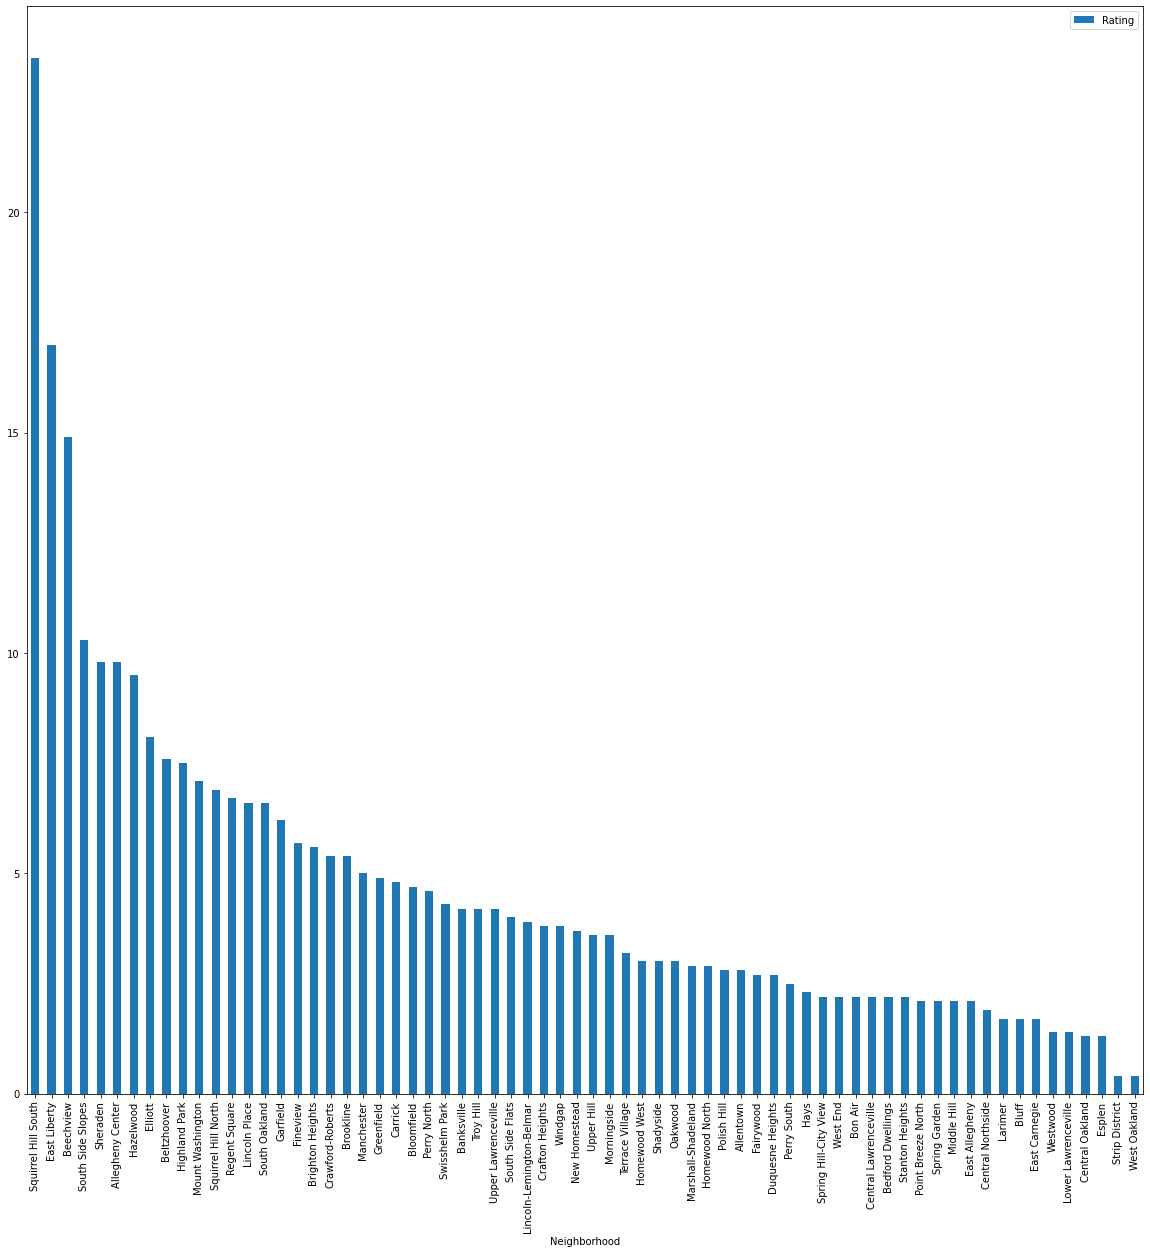

In [52]:
new_rate.plot.bar(figsize=(20,20),x='Neighborhood') # bar graph of the data


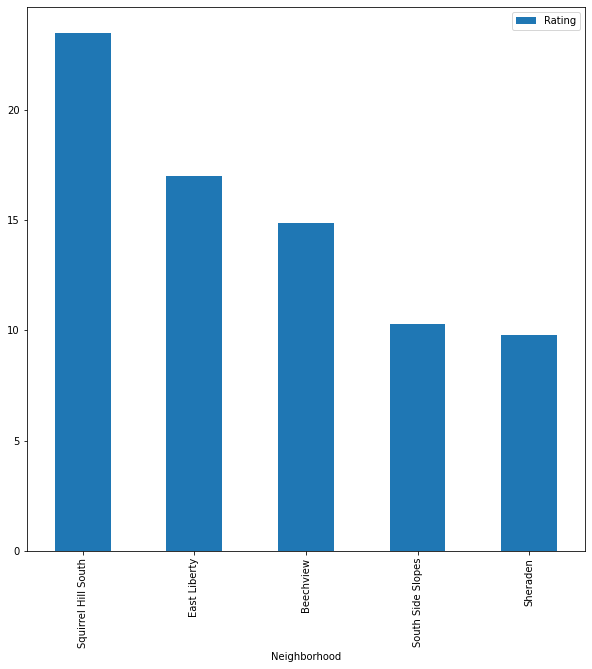

In [53]:
new_rate.head(5).plot.bar(figsize=(10,10),x='Neighborhood') #top five 

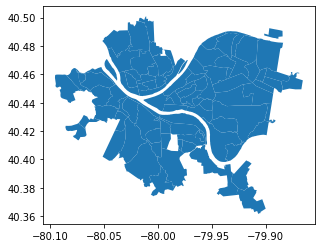

In [55]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") #import the map data
neighborhoods.plot()

In [56]:
mapthing = neighborhoods.merge(new_rate, how='left', left_on='hood', right_on='Neighborhood') # merge the map data with result data together
mapthing.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,Shape__Are,Shape__Len,geometry,Neighborhood,Rating
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,10687957.0,19600.6,"POLYGON ((-80.02999 40.45909, -80.02989 40.458...",NaN,nan
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,11332077.9,21174.5,"POLYGON ((-80.01078 40.49975, -80.01073 40.499...",NaN,nan
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,8743618.4,13811.9,"POLYGON ((-80.00327 40.48271, -80.00325 40.482...",NaN,nan
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,17549348.5,18197.7,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",Spring Hill-City View,2.2
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,25224201.0,26390.5,"POLYGON ((-80.01422 40.47745, -80.01435 40.477...",Perry South,2.5


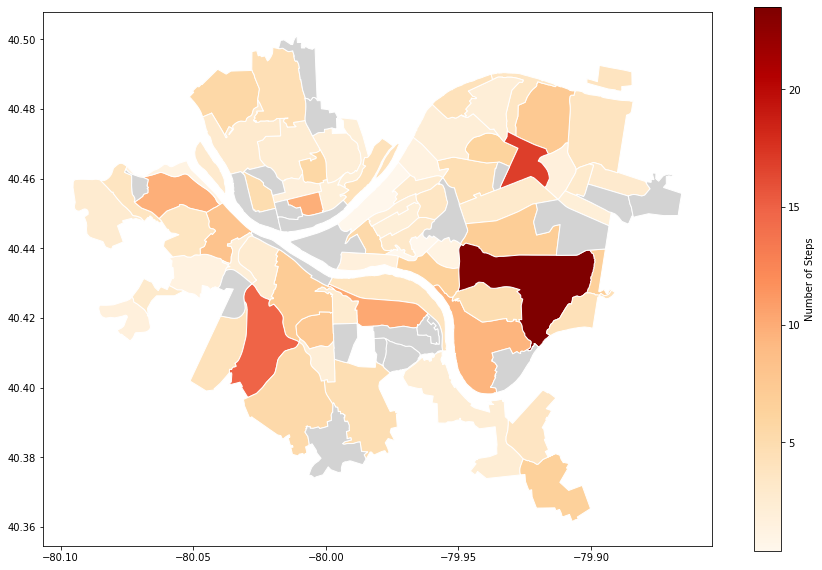

In [62]:
mapthing.plot(column='Rating', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
             ) # show the score on a map with color identify score

-----CONCLUSION----------
Squirrel Hill South has the highest score, it would be the best for kids under 10 for playing